In [15]:
!pip install opencv-python

     --------------------------------------- 35.6/35.6 MB 15.6 MB/s eta 0:00:00


In [79]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from zipfile import ZipFile

In [68]:
path = "C:\\Users\\ShankRam\\OneDrive\\Documents\\Assignments\\Deep Learning\\data\\ORLfaces.zip"
zipfile = ZipFile(path, 'r')
list_of_names = zipfile.namelist()

data = np.array([0]*16800)

with zipfile as zfile:
    for name in list_of_names:
        img = zfile.read(name)
        img = cv2.imdecode(np.frombuffer(img, np.uint8), 1)
        data = np.vstack([data, img.flatten()])
        
data = data[1:]/255

print(data.shape)

(410, 16800)


In [69]:
mod_data = data.T @ data
print(mod_data.shape)

(16800, 16800)


In [70]:
u, s, vh = np.linalg.svd(mod_data, hermitian = "True")

In [71]:
rank = 50

In [74]:
u = u[:, :rank]
vh = vh[:rank, :]
s = s[:rank]

reduced_data = u @ np.diag(s)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

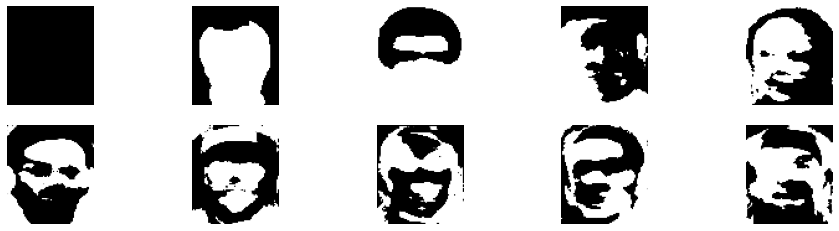

In [86]:
plt.figure(figsize = (16,4))

for i in range(10):
    image = reduced_data[:, i].reshape(80,70,3)
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.axis('off')

## Eigenfaces with PCA (using SVD). Need to center covariance matrix and divide by n-1\* variance. Also convert images to single channel.